In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

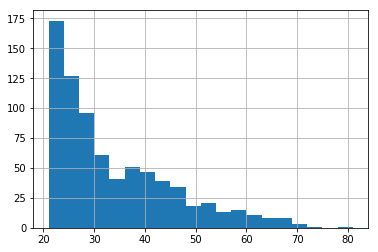

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [14]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [15]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [16]:
x_data = diabetes.drop('Class',axis=1)

In [17]:
labels = diabetes['Class']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [20]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [21]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_summary_steps': 100, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\shiva\\AppData\\Local\\Temp\\tmpi2969pdm', '_tf_random_seed': 1}


In [22]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\shiva\AppData\Local\Temp\tmpi2969pdm\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 371.162
INFO:tensorflow:step = 101, loss = 4.53762 (0.269 sec)
INFO:tensorflow:global_step/sec: 445.037
INFO:tensorflow:step = 201, loss = 5.88051 (0.225 sec)
INFO:tensorflow:global_step/sec: 483.557
INFO:tensorflow:step = 301, loss = 3.74117 (0.207 sec)
INFO:tensorflow:global_step/sec: 457.094
INFO:tensorflow:step = 401, loss = 5.97486 (0.219 sec)
INFO:tensorflow:global_step/sec: 470.321
INFO:tensorflow:step = 501, loss = 5.11241 (0.220 sec)
INFO:tensorflow:global_step/sec: 338.933
INFO:tensorflow:step = 601, loss = 4.99843 (0.292 sec)
INFO:tensorflow:global_step/sec: 320.531
INFO:tensorflow:step = 701, loss = 4.55433 (0.324 sec)
INFO:tensorflow:global_step/sec: 459.864
INFO:tensorflow:step = 801, loss = 5.95948 (0.217 sec)
INFO:tensorflow:global_step/sec: 457.094
IN

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-18-13:18:30
INFO:tensorflow:Restoring parameters from C:\Users\shiva\AppData\Local\Temp\tmpi2969pdm\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-18-13:18:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.728346, accuracy_baseline = 0.65748, auc = 0.786634, auc_precision_recall = 0.631126, average_loss = 0.533629, global_step = 1000, label/mean = 0.34252, loss = 5.21315, prediction/mean = 0.37751


In [25]:
results

{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78663373,
 'auc_precision_recall': 0.63112593,
 'average_loss': 0.53362918,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2131467,
 'prediction/mean': 0.37750989}

In [26]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [27]:
predictions = model.predict(pred_input_func)

In [28]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\shiva\AppData\Local\Temp\tmpi2969pdm\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.53759056], dtype=float32),
  'logits': array([ 0.15064657], dtype=float32),
  'probabilities': array([ 0.46240941,  0.53759056], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.64305139], dtype=float32),
  'logits': array([ 0.58863282], dtype=float32),
  'probabilities': array([ 0.35694861,  0.64305139], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40481591], dtype=float32),
  'logits': array([-0.38543844], dtype=float32),
  'probabilities': array([ 0.59518409,  0.40481585], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.32765004], dtype=float32),
  'logits': array([-0.71883279], dtype=float32),
  'probabilities': array([ 0.67234999,  0.32765007], dtype=flo